In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import broyden1

In [2]:
def solver(f, x0, t, task, eq_points, N_values, sol_provided=True, x_range=(5, 5), y_range=(5, 5)):
    N, infodict = odeint(f, x0, t, full_output=True)
    print(infodict['message'])

    N_rabbits, N_foxes = [], []
    for x, y in N:
        N_rabbits.append(x)
        N_foxes.append(y)

    plt.figure(task)
    plt.subplot(1, 2, 1)
    curves = plt.plot(t, N_rabbits, t, N_foxes)
    plt.grid()

    if sol_provided:
        x_n1 = eq_points[0]
    else:
        x_n1 = broyden1(f, [10,10])
        eq_points.insert(0, x_n1)
    print('x_n1:',x_n1)
    
    # Define x and y ranges
    x_left, x_right = x_n1[0] - x_range[0], x_n1[0] + x_range[1]
    y_left, y_right = x_n1[1] - y_range[0], x_n1[1] + y_range[1]
    
    values = list(zip(np.linspace(x_left, x_right, N_values), np.linspace(y_left, y_right, N_values)))
    vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

    plt.subplot(1, 2, 2)
    # trajectories
    for v, col in zip(values, vcolors):
        # P0 = [E * v for E in x_n1]
        P0 = [*v]
        P = odeint(f, P0, t, mxstep=5000000)
        # plt.plot( P[:, 0], P[:, 1], lw=0.2, color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]))


    ymax = plt.ylim(ymin=0)[1]
    xmax = plt.xlim(xmin=0)[1]
    # Define number of points
    nb_points = 10
    x = np.linspace(x_left, x_right, nb_points)
    y = np.linspace(y_left, y_right, nb_points)
    # Create meshgrid
    X1 , Y1 = np.meshgrid(x,y)
    # Calculate growth rate at each grid point
    DX1, DY1 = f([X1, Y1], 0)
    # Direction at each grid point is the hypotenuse of the prey direction and the
    # predator direction.
    M = (np.hypot(DX1, DY1))
    # This is to avoid any divisions when normalizing
    M[M == 0] = 1.
    # Normalize the length of each arrow (optional)
    DX1 /= M
    DY1 /= M

    #Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='tip', cmap=plt.cm.plasma)
    
    plt.streamplot(X1, Y1, DX1, DY1, color='black')
    
    print('Equlibrium points for non-negative x, y:')
    for eq_point in eq_points:
        x, y = eq_point
        print(x, y)
        plt.plot(x, y, marker='o', markersize=5, color='red')

    plt.xlim([x_left, x_right])
    plt.ylim([y_left, y_right])

    plt.show()


Integration successful.
x_n1: (3.3333333333333335, 2.5)
Equlibrium points for non-negative x, y:
3.3333333333333335 2.5


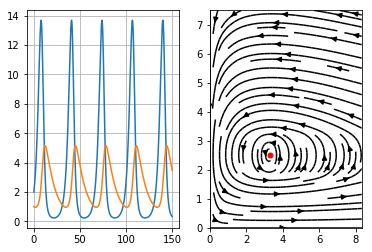

In [4]:
gamma = [0.2, 0.03]
eps = [0.5, 0.1]

def func1(n, t):
    return [
        eps[0] * n[0] - gamma[0] * n[0] * n[1],
        -eps[1] * n[1] + gamma[1] * n[0] * n[1]
    ]

x0 = [2, 1]
t = np.linspace(0, 150, 10000)
N1_eq = eps[1] / gamma[1]
N2_eq = eps[0] / gamma[0] 
eq_points = [(N1_eq, N2_eq)]

solver(func1, x0, t, '1', eq_points, 20, True, (N1_eq,5), (N2_eq,5))

In [ ]:
gamma = [1, 2]
eps = [1, 1]
alpha = 0.1

def func2(n, t=0):
    return [
        (eps[0] - gamma[0] * n[1] - alpha * n[0]) * n[0],
        n[1] * (gamma[1] * n[0] - eps[1])
    ]

x0 = [1, 2]
t = np.linspace(0, 50, 10000)
N1_eq = eps[1] / gamma[1]
N2_eq = (eps[0] * gamma[1] - alpha * eps[1]) / (gamma[0] * gamma[1])
eq_points = [(N1_eq, N2_eq),
             (eps[0] / alpha, 0),
             (0, 0)]

solver(func2, x0, t, '2', eq_points, 5, True, (N1_eq, 12), (N2_eq, 12))

In [ ]:
gamma = [[4, 0.7],
         [10, 5]]
eps = [8, 12]

def func3(n, t=0):
    return [
        (eps[0] - gamma[0][0] * n[1] - gamma[0][1] * n[0]) * n[0],
        (-eps[1] + gamma[1][0] * n[0] - gamma[1][1] * n[1]) * n[1]
    ]

x0 = [3, 2]
t = np.linspace(0, 20, 10000)
N2_eq = (eps[0]*gamma[1][0] - gamma[0][1]*eps[1]) \
    / (gamma[0][0]*gamma[1][0] + gamma[0][1]*gamma[1][1])
N1_eq = (gamma[1][1] * N2_eq + eps[1]) / gamma[1][0]
eq_points = [(N1_eq, N2_eq), (0,0), (eps[0] / gamma[0][1], 0)] #, (0, -eps[1] / gamma[1][1])] ! this is additional point if eps[1] < 0 !
solver(func3, x0, t, '3', eq_points, 10, True, (N1_eq, 12), (N2_eq, 12))

In [ ]:
gamma = [0.5, 0.2]
alpha = [-5, 2]
beta = 0.2
eps = [1, 0.85]


def func4(n, t=0):
    return [
        n[0] * (eps[0] - gamma[0] * n[0]) - (alpha[0] * n[0] * n[1]) / (1 + beta * n[0]),
        -n[1] * (eps[1] + gamma[1] * n[1]) + (alpha[1] * n[0] * n[1]) / (1 + beta * n[0])
    ]

x0 = [1, 1]
t = np.linspace(0, 5, 10000)

eq_points = [(0,0), (eps[0] / gamma[0], 0)] 
solver(func4, x0, t, '4', eq_points, 50, False, (16.61,20), (13.6,20))